In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
df = pd.read_csv(r"/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")

In [4]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [5]:
df.drop(['car_ID', 'CarName'], 1, inplace=True)

In [6]:
df.shape

(205, 24)

In [7]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

### a quick look tells that doornumber and cylindernumber can be changed to numerical data

In [9]:
df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [10]:
df.loc[:, 'doornumber'] = df.loc[:, 'doornumber'].map({'four':4, 'two':2})

In [11]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [13]:
df.loc[:, 'cylindernumber'] = df.loc[:, 'cylindernumber'].map({'four':4, 'six':6, 'five':5, 'twelve':12, 'eight':8, 'three':3, 'two':2})

In [14]:
df.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

### exploring each object column

In [16]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [17]:
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [18]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [19]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [20]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [21]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [22]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

## one hot encoding

In [23]:
catg_cols = df.select_dtypes(include='object')

In [24]:
catg_cols

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,gas,std,convertible,rwd,front,dohc,mpfi
1,gas,std,convertible,rwd,front,dohc,mpfi
2,gas,std,hatchback,rwd,front,ohcv,mpfi
3,gas,std,sedan,fwd,front,ohc,mpfi
4,gas,std,sedan,4wd,front,ohc,mpfi
5,gas,std,sedan,fwd,front,ohc,mpfi
6,gas,std,sedan,fwd,front,ohc,mpfi
7,gas,std,wagon,fwd,front,ohc,mpfi
8,gas,turbo,sedan,fwd,front,ohc,mpfi
9,gas,turbo,hatchback,4wd,front,ohc,mpfi


In [25]:
from sklearn.preprocessing import LabelEncoder     ### way much more elegant than get_dummies <3

le = LabelEncoder()

for col in catg_cols:
    df.loc[:, col] = le.fit_transform(df.loc[:, col])

In [26]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,6,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,4,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,5,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
df.fuelsystem.value_counts()   
# previously these were strings/ categorical columns                                
                                # mpfi    1bbl
                                # idi     bbl    
                                # spdi    bbl    
                                # spfi    
                                # mfi 

5    94
1    66
3    20
0    11
6     9
2     3
4     1
7     1
Name: fuelsystem, dtype: int64

In [28]:
df.enginetype.value_counts()

3    148
4     15
5     13
0     12
2     12
6      4
1      1
Name: enginetype, dtype: int64

<AxesSubplot:>

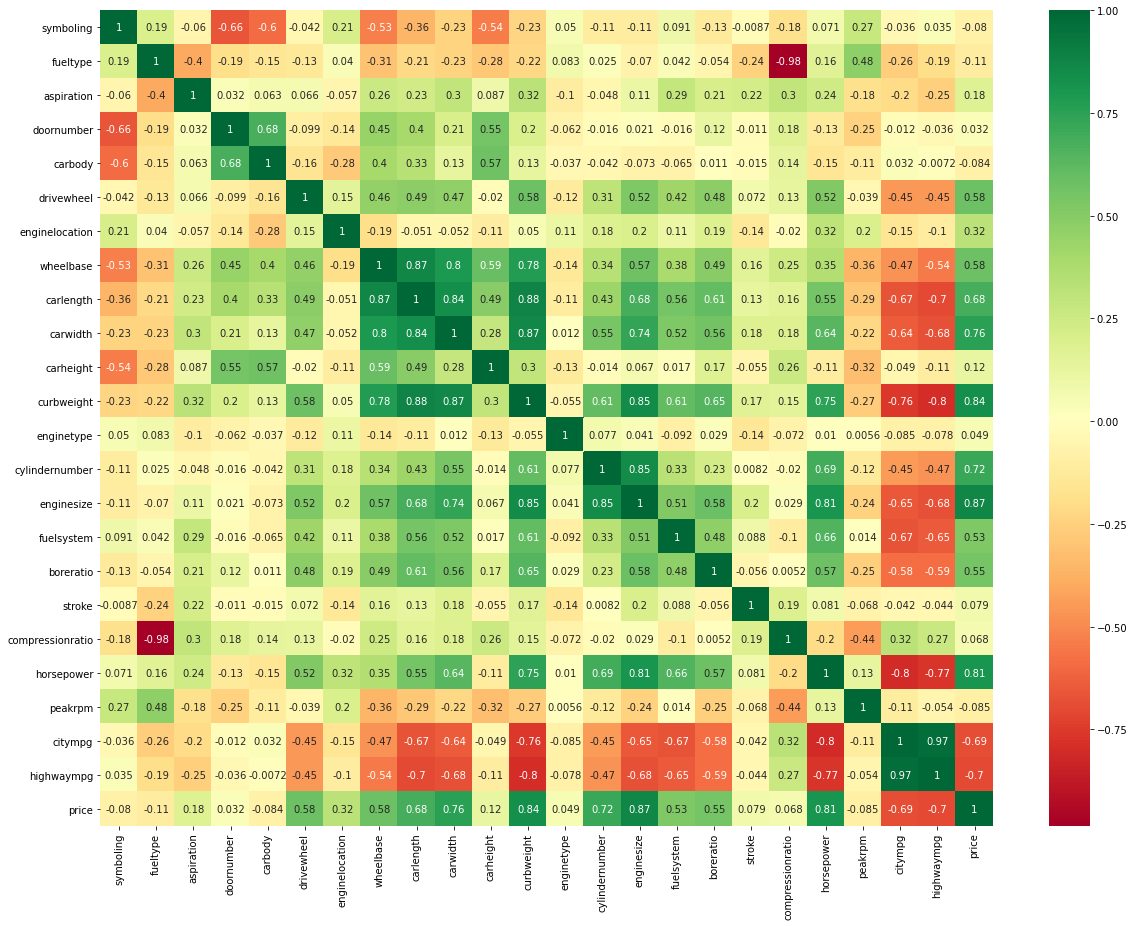

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')

### dropping columns having no correaltion with price

In [30]:
df.drop(['symboling', 'doornumber', 'carbody', 'enginetype', 'stroke', 'compressionratio', 'peakrpm'], 1, inplace=True)

### IMPORTANT - looking for missing values

In [31]:
df.isnull().sum()

fueltype          0
aspiration        0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
citympg           0
highwaympg        0
price             0
dtype: int64

### splitting data

In [32]:
data = df.drop('price', 1)
targets = df['price']

# 50 percent of 205 = 102
train_data = data.iloc[:102] ############# 0 based so end at 143 @!%$#&^$&!@$
train_targets = targets.iloc[:102]

# 20 percent of 205 = 41
validation_data = data.iloc[102: 143]
validation_targets = targets.iloc[102: 143]

# 30 percent for test
# 205 - 143 = 62
test_data = data.iloc[143:]
test_targets = targets.iloc[143:]

# cross checking
print('Data, Targets', end='\n\n')
print('TRAIN')
print(train_data.shape)
print(train_targets.shape)
print('#'*15)

print('VALIDATION')
print(validation_data.shape)
print(validation_targets.shape)
print('#'*15)

print('TEST')
print(test_data.shape)
print(test_targets.shape)

Data, Targets

TRAIN
(102, 16)
(102,)
###############
VALIDATION
(41, 16)
(41,)
###############
TEST
(62, 16)
(62,)


In [33]:
print(train_data.isnull().sum())
print('-'*25)
print(validation_data.isnull().sum())
print('-'*25)
print(test_data.isnull().sum())
print('-'*25)

fueltype          0
aspiration        0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
citympg           0
highwaympg        0
dtype: int64
-------------------------
fueltype          0
aspiration        0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
citympg           0
highwaympg        0
dtype: int64
-------------------------
fueltype          0
aspiration        0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
ci

### Normalization

In [34]:
df.shape

(205, 17)

In [35]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

validation_data-=mean
validation_data /= std

test_data-=mean
test_data /= std

sanity check

In [36]:
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(102, 16)
(41, 16)
(62, 16)


In [37]:
print(train_data.isnull().sum())
print('-'*25)
print(validation_data.isnull().sum())
print('-'*25)
print(test_data.isnull().sum())
print('-'*25)

fueltype            0
aspiration          0
drivewheel          0
enginelocation    102
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
horsepower          0
citympg             0
highwaympg          0
dtype: int64
-------------------------
fueltype           0
aspiration         0
drivewheel         0
enginelocation    38
wheelbase          0
carlength          0
carwidth           0
carheight          0
curbweight         0
cylindernumber     0
enginesize         0
fuelsystem         0
boreratio          0
horsepower         0
citympg            0
highwaympg         0
dtype: int64
-------------------------
fueltype           0
aspiration         0
drivewheel         0
enginelocation    62
wheelbase          0
carlength          0
carwidth           0
carheight          0
curbweight         0
cylindernumber     0
enginesize         0
fue

#### ^ found the culprint

In [42]:
df.enginelocation.value_counts() # 0 occurs 202 times, 1 occurs 3 time --- Im imputing the nans with 0s

0    202
1      3
Name: enginelocation, dtype: int64

In [47]:
train_data = train_data.fillna(0)

validation_data = validation_data.fillna(0)

test_data = test_data.fillna(0)

In [48]:
print(train_data.isnull().sum())
print('-'*25)
print(validation_data.isnull().sum())
print('-'*25)
print(test_data.isnull().sum())
print('-'*25)

fueltype          0
aspiration        0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
citympg           0
highwaympg        0
dtype: int64
-------------------------
fueltype          0
aspiration        0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
citympg           0
highwaympg        0
dtype: int64
-------------------------
fueltype          0
aspiration        0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
ci

In [53]:
print(train_targets.isnull().sum())
print('-'*25)
print(validation_targets.isnull().sum())
print('-'*25)
print(test_targets.isnull().sum())
print('-'*25)

0
-------------------------
0
-------------------------
0
-------------------------


## still nan values in validation

In [70]:
# train_data.drop('enginelocation', 1, inplace=True)
validation_data.drop('enginelocation', 1, inplace=True)
test_data.drop('enginelocation', 1, inplace=True)

In [71]:
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(102, 15)
(41, 15)
(62, 15)


In [75]:
# BUILDING BASE LINE MODEL
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Dense(10, activation='relu', input_shape=(train_data.shape[1],)))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1))

In [76]:
# COMPILING
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [77]:
# FITTING
history = model.fit(train_data, train_targets, epochs=500, batch_size=32, validation_data=(validation_data, validation_targets))

Epoch 1/500
4/4 [==============================] - 1s 74ms/step - loss: 274637862.4000 - mae: 13748.8822 - val_loss: 280423552.0000 - val_mae: 14914.5273
Epoch 2/500
4/4 [==============================] - 0s 20ms/step - loss: 260235241.6000 - mae: 13369.6646 - val_loss: 280419168.0000 - val_mae: 14914.3936
Epoch 3/500
4/4 [==============================] - 0s 18ms/step - loss: 291476198.4000 - mae: 13940.5012 - val_loss: 280415296.0000 - val_mae: 14914.2744
Epoch 4/500
4/4 [==============================] - 0s 19ms/step - loss: 262770569.6000 - mae: 13532.8611 - val_loss: 280410336.0000 - val_mae: 14914.1279
Epoch 5/500
4/4 [==============================] - 0s 17ms/step - loss: 263185206.4000 - mae: 13329.4438 - val_loss: 280405888.0000 - val_mae: 14913.9922
Epoch 6/500
4/4 [==============================] - 0s 18ms/step - loss: 260103846.4000 - mae: 13425.6672 - val_loss: 280400864.0000 - val_mae: 14913.8447
Epoch 7/500
4/4 [==============================] - 0s 18ms/step - loss: 2951

Epoch 54/500
4/4 [==============================] - 0s 18ms/step - loss: 264410822.4000 - mae: 13535.0961 - val_loss: 279398848.0000 - val_mae: 14884.9639
Epoch 55/500
4/4 [==============================] - 0s 17ms/step - loss: 297890099.2000 - mae: 14204.1475 - val_loss: 279341792.0000 - val_mae: 14883.3320
Epoch 56/500
4/4 [==============================] - 0s 18ms/step - loss: 290076134.4000 - mae: 13876.8689 - val_loss: 279288608.0000 - val_mae: 14881.8105
Epoch 57/500
4/4 [==============================] - 0s 18ms/step - loss: 301218662.4000 - mae: 14219.7355 - val_loss: 279235584.0000 - val_mae: 14880.2910
Epoch 58/500
4/4 [==============================] - 0s 18ms/step - loss: 265461977.6000 - mae: 13561.9361 - val_loss: 279179456.0000 - val_mae: 14878.6934
Epoch 59/500
4/4 [==============================] - 0s 17ms/step - loss: 294137856.0000 - mae: 14191.9273 - val_loss: 279124864.0000 - val_mae: 14877.1133
Epoch 60/500
4/4 [==============================] - 0s 18ms/step - los

Epoch 107/500
4/4 [==============================] - 0s 18ms/step - loss: 253583049.6000 - mae: 13166.9941 - val_loss: 273571936.0000 - val_mae: 14717.6768
Epoch 108/500
4/4 [==============================] - 0s 17ms/step - loss: 290154342.4000 - mae: 14075.7859 - val_loss: 273394848.0000 - val_mae: 14712.5508
Epoch 109/500
4/4 [==============================] - 0s 18ms/step - loss: 285154758.4000 - mae: 13775.5338 - val_loss: 273158816.0000 - val_mae: 14705.7988
Epoch 110/500
4/4 [==============================] - 0s 19ms/step - loss: 252443984.0000 - mae: 13403.3957 - val_loss: 272908160.0000 - val_mae: 14698.5986
Epoch 111/500
4/4 [==============================] - 0s 17ms/step - loss: 268176704.0000 - mae: 13426.2191 - val_loss: 272728992.0000 - val_mae: 14693.3965
Epoch 112/500
4/4 [==============================] - 0s 18ms/step - loss: 274726284.8000 - mae: 13617.6770 - val_loss: 272545664.0000 - val_mae: 14688.0703
Epoch 113/500
4/4 [==============================] - 0s 17ms/ste

4/4 [==============================] - 0s 18ms/step - loss: 248267977.6000 - mae: 13099.1176 - val_loss: 256678368.0000 - val_mae: 14222.4883
Epoch 160/500
4/4 [==============================] - 0s 17ms/step - loss: 275383427.2000 - mae: 13574.2279 - val_loss: 256311776.0000 - val_mae: 14211.4053
Epoch 161/500
4/4 [==============================] - 0s 18ms/step - loss: 255222483.2000 - mae: 13110.4867 - val_loss: 255780960.0000 - val_mae: 14195.7422
Epoch 162/500
4/4 [==============================] - 0s 17ms/step - loss: 238272678.4000 - mae: 12819.0082 - val_loss: 255192592.0000 - val_mae: 14178.2207
Epoch 163/500
4/4 [==============================] - 0s 18ms/step - loss: 256478096.0000 - mae: 13212.5031 - val_loss: 254754512.0000 - val_mae: 14165.0303
Epoch 164/500
4/4 [==============================] - 0s 18ms/step - loss: 279645817.6000 - mae: 13854.8658 - val_loss: 254364992.0000 - val_mae: 14153.2686
Epoch 165/500
4/4 [==============================] - 0s 17ms/step - loss: 2815

4/4 [==============================] - 0s 17ms/step - loss: 229763932.8000 - mae: 12590.1375 - val_loss: 222801616.0000 - val_mae: 13166.6035
Epoch 212/500
4/4 [==============================] - 0s 17ms/step - loss: 241639491.2000 - mae: 12992.7648 - val_loss: 221852592.0000 - val_mae: 13135.7275
Epoch 213/500
4/4 [==============================] - 0s 18ms/step - loss: 213506777.6000 - mae: 12184.0420 - val_loss: 220838656.0000 - val_mae: 13102.5820
Epoch 214/500
4/4 [==============================] - 0s 17ms/step - loss: 226181721.6000 - mae: 12636.7492 - val_loss: 219904656.0000 - val_mae: 13072.1494
Epoch 215/500
4/4 [==============================] - 0s 18ms/step - loss: 236817689.6000 - mae: 12704.3715 - val_loss: 219152640.0000 - val_mae: 13047.2725
Epoch 216/500
4/4 [==============================] - 0s 17ms/step - loss: 211067225.6000 - mae: 12130.5334 - val_loss: 218159728.0000 - val_mae: 13014.6055
Epoch 217/500
4/4 [==============================] - 0s 17ms/step - loss: 2159

4/4 [==============================] - 0s 17ms/step - loss: 168004108.8000 - mae: 11057.2812 - val_loss: 167778672.0000 - val_mae: 11201.9014
Epoch 264/500
4/4 [==============================] - 0s 17ms/step - loss: 171254460.8000 - mae: 11194.9254 - val_loss: 166587856.0000 - val_mae: 11154.3936
Epoch 265/500
4/4 [==============================] - 0s 18ms/step - loss: 158837043.2000 - mae: 10585.4967 - val_loss: 165309168.0000 - val_mae: 11103.5293
Epoch 266/500
4/4 [==============================] - 0s 17ms/step - loss: 168050416.0000 - mae: 10880.0340 - val_loss: 163797088.0000 - val_mae: 11043.5088
Epoch 267/500
4/4 [==============================] - 0s 18ms/step - loss: 170451203.2000 - mae: 11173.4410 - val_loss: 162611904.0000 - val_mae: 10995.4326
Epoch 268/500
4/4 [==============================] - 0s 17ms/step - loss: 152276092.8000 - mae: 10543.4236 - val_loss: 161207376.0000 - val_mae: 10938.6660
Epoch 269/500
4/4 [==============================] - 0s 17ms/step - loss: 1652

Epoch 316/500
4/4 [==============================] - 0s 17ms/step - loss: 105347555.2000 - mae: 8892.0346 - val_loss: 98917760.0000 - val_mae: 7929.4160
Epoch 317/500
4/4 [==============================] - 0s 18ms/step - loss: 103325321.6000 - mae: 8915.7207 - val_loss: 97647360.0000 - val_mae: 7859.2500
Epoch 318/500
4/4 [==============================] - 0s 17ms/step - loss: 101943028.8000 - mae: 8843.8711 - val_loss: 96403720.0000 - val_mae: 7788.8140
Epoch 319/500
4/4 [==============================] - 0s 17ms/step - loss: 92740684.8000 - mae: 8493.0587 - val_loss: 95139552.0000 - val_mae: 7716.1709
Epoch 320/500
4/4 [==============================] - 0s 17ms/step - loss: 86713888.0000 - mae: 8190.5637 - val_loss: 93512632.0000 - val_mae: 7622.7607
Epoch 321/500
4/4 [==============================] - 0s 18ms/step - loss: 93194704.0000 - mae: 8463.9838 - val_loss: 92437992.0000 - val_mae: 7559.3193
Epoch 322/500
4/4 [==============================] - 0s 18ms/step - loss: 100110460.8

Epoch 370/500
4/4 [==============================] - 0s 18ms/step - loss: 43860029.6000 - mae: 5466.3762 - val_loss: 50695104.0000 - val_mae: 5220.2266
Epoch 371/500
4/4 [==============================] - 0s 17ms/step - loss: 44829859.2000 - mae: 5634.8316 - val_loss: 50392912.0000 - val_mae: 5216.4419
Epoch 372/500
4/4 [==============================] - 0s 18ms/step - loss: 37809367.2000 - mae: 5135.9661 - val_loss: 50112636.0000 - val_mae: 5213.6304
Epoch 373/500
4/4 [==============================] - 0s 17ms/step - loss: 39942376.0000 - mae: 5260.2448 - val_loss: 49908000.0000 - val_mae: 5209.6899
Epoch 374/500
4/4 [==============================] - 0s 18ms/step - loss: 38854138.4000 - mae: 5146.1823 - val_loss: 49571452.0000 - val_mae: 5208.4834
Epoch 375/500
4/4 [==============================] - 0s 17ms/step - loss: 36579332.8000 - mae: 5038.7524 - val_loss: 49342360.0000 - val_mae: 5207.0923
Epoch 376/500
4/4 [==============================] - 0s 17ms/step - loss: 38329590.4000 

Epoch 424/500
4/4 [==============================] - 0s 17ms/step - loss: 26307837.6000 - mae: 4040.9515 - val_loss: 47593788.0000 - val_mae: 5284.1724
Epoch 425/500
4/4 [==============================] - 0s 18ms/step - loss: 27584097.2000 - mae: 4231.6487 - val_loss: 47751048.0000 - val_mae: 5299.0981
Epoch 426/500
4/4 [==============================] - 0s 23ms/step - loss: 28107695.2000 - mae: 4265.7156 - val_loss: 47567056.0000 - val_mae: 5286.2222
Epoch 427/500
4/4 [==============================] - 0s 23ms/step - loss: 28629938.0000 - mae: 4323.5441 - val_loss: 47400740.0000 - val_mae: 5273.9985
Epoch 428/500
4/4 [==============================] - 0s 21ms/step - loss: 26511582.8000 - mae: 4095.7140 - val_loss: 47268340.0000 - val_mae: 5266.3779
Epoch 429/500
4/4 [==============================] - 0s 18ms/step - loss: 30474667.2000 - mae: 4519.6927 - val_loss: 47223496.0000 - val_mae: 5262.8130
Epoch 430/500
4/4 [==============================] - 0s 18ms/step - loss: 26531729.6000 

Epoch 478/500
4/4 [==============================] - 0s 18ms/step - loss: 25351958.8000 - mae: 4062.4922 - val_loss: 43823416.0000 - val_mae: 5009.2222
Epoch 479/500
4/4 [==============================] - 0s 18ms/step - loss: 24727074.8000 - mae: 4000.4821 - val_loss: 43940744.0000 - val_mae: 5019.4346
Epoch 480/500
4/4 [==============================] - 0s 18ms/step - loss: 23659453.2000 - mae: 4014.4001 - val_loss: 44049696.0000 - val_mae: 5026.2637
Epoch 481/500
4/4 [==============================] - 0s 19ms/step - loss: 22310611.6000 - mae: 3772.7139 - val_loss: 43933004.0000 - val_mae: 5018.0771
Epoch 482/500
4/4 [==============================] - 0s 18ms/step - loss: 23694166.8000 - mae: 3949.5201 - val_loss: 44048620.0000 - val_mae: 5027.1157
Epoch 483/500
4/4 [==============================] - 0s 18ms/step - loss: 25281935.2000 - mae: 4187.9058 - val_loss: 44261188.0000 - val_mae: 5049.1089
Epoch 484/500
4/4 [==============================] - 0s 19ms/step - loss: 23564802.0000 

##### new day new problems - never saw nan before

https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network

### Changing Architecture

In [87]:

from keras import layers
from keras import models
from keras import regularizers


model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],), kernel_regularizer=regularizers.l2(0.002)))

model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.002)))

model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.002)))

model.add(layers.Dense(1))


# COMPILING
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# FITTING
history = model.fit(train_data, train_targets, epochs=250, batch_size=32, validation_data= (validation_data, validation_targets))

Epoch 1/250
4/4 [==============================] - 1s 72ms/step - loss: 285680835.2000 - mae: 13968.3990 - val_loss: 280431872.0000 - val_mae: 14914.8398
Epoch 2/250
4/4 [==============================] - 0s 17ms/step - loss: 279174348.8000 - mae: 13781.6357 - val_loss: 280421248.0000 - val_mae: 14914.5186
Epoch 3/250
4/4 [==============================] - 0s 18ms/step - loss: 302039315.2000 - mae: 14264.2324 - val_loss: 280410944.0000 - val_mae: 14914.1992
Epoch 4/250
4/4 [==============================] - 0s 17ms/step - loss: 282892665.6000 - mae: 13985.9371 - val_loss: 280398976.0000 - val_mae: 14913.8350
Epoch 5/250
4/4 [==============================] - 0s 18ms/step - loss: 273354822.4000 - mae: 13569.2305 - val_loss: 280383904.0000 - val_mae: 14913.3906
Epoch 6/250
4/4 [==============================] - 0s 17ms/step - loss: 294786233.6000 - mae: 13950.4504 - val_loss: 280365632.0000 - val_mae: 14912.8584
Epoch 7/250
4/4 [==============================] - 0s 18ms/step - loss: 2905

Epoch 54/250
4/4 [==============================] - 0s 19ms/step - loss: 203214006.4000 - mae: 11807.9090 - val_loss: 208562032.0000 - val_mae: 12661.1025
Epoch 55/250
4/4 [==============================] - 0s 23ms/step - loss: 192815260.8000 - mae: 11528.3520 - val_loss: 203397376.0000 - val_mae: 12480.1621
Epoch 56/250
4/4 [==============================] - 0s 21ms/step - loss: 197178352.0000 - mae: 11610.4465 - val_loss: 197967984.0000 - val_mae: 12287.1729
Epoch 57/250
4/4 [==============================] - 0s 18ms/step - loss: 215236569.6000 - mae: 12029.6271 - val_loss: 192622784.0000 - val_mae: 12093.2734
Epoch 58/250
4/4 [==============================] - 0s 18ms/step - loss: 190513961.6000 - mae: 11344.3012 - val_loss: 187326544.0000 - val_mae: 11896.9668
Epoch 59/250
4/4 [==============================] - 0s 18ms/step - loss: 191390361.6000 - mae: 11528.2881 - val_loss: 181780912.0000 - val_mae: 11687.1445
Epoch 60/250
4/4 [==============================] - 0s 18ms/step - los

Epoch 108/250
4/4 [==============================] - 0s 18ms/step - loss: 23149809.2000 - mae: 3906.5953 - val_loss: 46146112.0000 - val_mae: 5165.7417
Epoch 109/250
4/4 [==============================] - 0s 18ms/step - loss: 22975071.2000 - mae: 3865.8712 - val_loss: 46069652.0000 - val_mae: 5159.4741
Epoch 110/250
4/4 [==============================] - 0s 18ms/step - loss: 21333229.6000 - mae: 3614.9072 - val_loss: 46000928.0000 - val_mae: 5153.7173
Epoch 111/250
4/4 [==============================] - 0s 17ms/step - loss: 21284217.2000 - mae: 3748.9859 - val_loss: 45804140.0000 - val_mae: 5139.1777
Epoch 112/250
4/4 [==============================] - 0s 18ms/step - loss: 22473237.6000 - mae: 3801.4816 - val_loss: 45672300.0000 - val_mae: 5132.0752
Epoch 113/250
4/4 [==============================] - 0s 18ms/step - loss: 22658196.8000 - mae: 3779.2016 - val_loss: 45576080.0000 - val_mae: 5127.5225
Epoch 114/250
4/4 [==============================] - 0s 17ms/step - loss: 22629244.4000 

Epoch 162/250
4/4 [==============================] - 0s 18ms/step - loss: 15624785.8000 - mae: 3065.8479 - val_loss: 41085600.0000 - val_mae: 4780.5771
Epoch 163/250
4/4 [==============================] - 0s 18ms/step - loss: 13629568.6000 - mae: 2892.6085 - val_loss: 41019468.0000 - val_mae: 4772.2485
Epoch 164/250
4/4 [==============================] - 0s 18ms/step - loss: 14106519.6000 - mae: 2945.2528 - val_loss: 40997056.0000 - val_mae: 4768.1650
Epoch 165/250
4/4 [==============================] - 0s 17ms/step - loss: 14271189.2000 - mae: 2994.1736 - val_loss: 41101620.0000 - val_mae: 4776.2090
Epoch 166/250
4/4 [==============================] - 0s 18ms/step - loss: 13292328.0000 - mae: 2889.6262 - val_loss: 41458232.0000 - val_mae: 4806.9014
Epoch 167/250
4/4 [==============================] - 0s 17ms/step - loss: 13573645.6000 - mae: 2956.4749 - val_loss: 41928840.0000 - val_mae: 4843.0410
Epoch 168/250
4/4 [==============================] - 0s 17ms/step - loss: 14842714.6000 

Epoch 216/250
4/4 [==============================] - 0s 18ms/step - loss: 9578292.8000 - mae: 2379.9247 - val_loss: 41920584.0000 - val_mae: 4797.6709
Epoch 217/250
4/4 [==============================] - 0s 18ms/step - loss: 9605058.6000 - mae: 2373.9576 - val_loss: 42132260.0000 - val_mae: 4811.6372
Epoch 218/250
4/4 [==============================] - 0s 18ms/step - loss: 9615793.4000 - mae: 2403.9831 - val_loss: 42392228.0000 - val_mae: 4830.0771
Epoch 219/250
4/4 [==============================] - 0s 17ms/step - loss: 10374974.8000 - mae: 2501.7274 - val_loss: 42658396.0000 - val_mae: 4847.8564
Epoch 220/250
4/4 [==============================] - 0s 17ms/step - loss: 7631722.6000 - mae: 2137.1366 - val_loss: 42820936.0000 - val_mae: 4857.7412
Epoch 221/250
4/4 [==============================] - 0s 17ms/step - loss: 9541602.4000 - mae: 2399.0763 - val_loss: 43013484.0000 - val_mae: 4873.8110
Epoch 222/250
4/4 [==============================] - 0s 17ms/step - loss: 10156417.8000 - mae

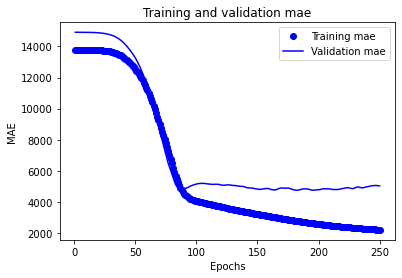

In [88]:
import matplotlib.pyplot as plt
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training mae')
plt.plot(epochs, val_loss, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()